In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from scipy import stats
import matplotlib as mpl
import statsmodels.api as s

In [5]:
datadmy=pd.read_excel("C:/Users/SHIVLEON/Downloads/dummy.xlsx")

In [6]:
datadmy

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'Simple Linear Regression')

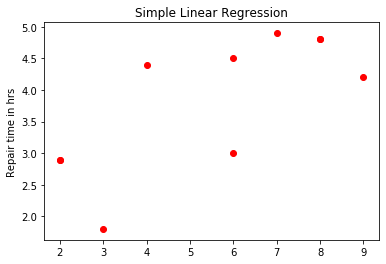

In [7]:
plt.scatter(datadmy["months_since_last_service"], datadmy["repair_time_in_hours"], color="red")
plt.ylabel("Repair time in hrs")
plt.title("Simple Linear Regression")

In [8]:
from statsmodels.formula.api import ols
res=ols(formula="repair_time_in_hours ~ months_since_last_service", data=datadmy).fit() # ols(formula=" dependent ~ indep1+indep2+...+indepn")
res.summary()

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Thu, 19 Mar 2020   Prob (F-statistic):             0.0163
Time:                          10:45:34   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
""" From the above we interpret that:
equation is: y= 2.1473+ 0.3041(months_since_last_service)
Since P>|t| of months_since_last_service is <0.05
we reject our null hypothesis"""

' From the above we interpret that:\nequation is: y= 2.1473+ 0.3041(months_since_last_service)\nSince P>|t| of months_since_last_service is <0.05\nwe reject our null hypothesis'

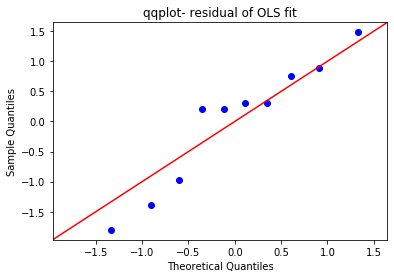

In [11]:
#Plotting residual plot
resi=res.resid #residual
probplot= s.ProbPlot(resi,stats.norm, fit=True)
fig=probplot.qqplot(line="45")
h=plt.title("qqplot- residual of OLS fit")
plt.show()

In [12]:
#Type of repair is also a necessary factor, but since its in
#string type(categorical) we will convert it into dummy type
#no. of dummy variables reuqired= no. of categorical variable-1
just_dummies=pd.get_dummies(datadmy["type_of_repair"])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [14]:
#Now we will add the dummy table in our main table, since we need only n-1, we will drop either one of them.
# for now we will be dropping the mechanical column
#and we will also drop the categorical columns through which we have derived the dummy columns
step1=pd.concat([datadmy, just_dummies],axis=1)
step1.drop(["type_of_repair", "mechanical"], inplace=True, axis=1)
step1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [17]:
result=s.OLS(step1["repair_time_in_hours"], s.add_constant(step1[["months_since_last_service","electrical"]])).fit()
result.summary()

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Thu, 19 Mar 2020   Prob (F-statistic):            0.00105
Time:                          10:58:32   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""